In [1]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline 
from PIL import Image
import numpy as np

In [2]:
# Каталог с данными для обучения
train_dir = 'mydata/train'
# Каталог с данными для проверки
val_dir = 'mydata/validation'
# Каталог с данными для тестирования
test_dir = 'mydata/test'
# Размеры изображения
img_width, img_height = 200, 200
# Размерность тензора на основе изображения для входных данных в нейронную сеть
# backend Tensorflow, channels_last
input_shape = (img_width, img_height, 1)
# Размер мини-выборки
batch_size = 10

In [3]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                  rotation_range=25,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

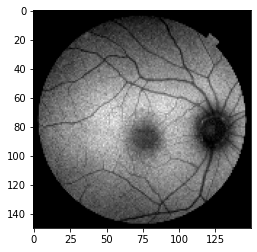

In [4]:
image_file_name = train_dir + '/train_norma/norma.0.jpg'
img = image.load_img(image_file_name, target_size=(150, 150))
plt.imshow(img)

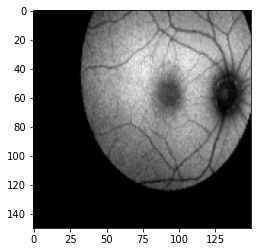

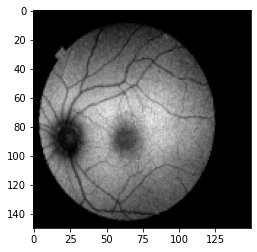

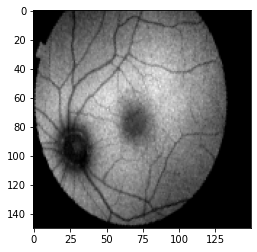

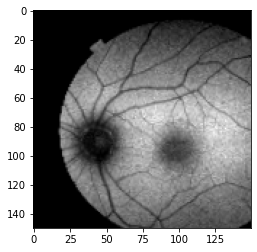

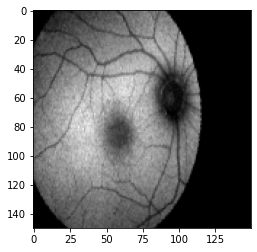

In [5]:
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 5 == 0:
        break
plt.show()

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 18 images belonging to 8 classes.


In [7]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [8]:
val_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 10 images belonging to 8 classes.


In [9]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 8 images belonging to 8 classes.


In [14]:
from tensorflow import keras
# load weights into new model
new_model = keras.models.load_model("multi_CNN_200x200_50epoch.h5")
print("Loaded model from disk")

Loaded model from disk


In [15]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 16)      1216      
_________________________________________________________________
batch_normalization (BatchNo (None, 200, 200, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        5

In [19]:
new_model.add(Dense(8, activation='sigmoid'))
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 16)      1216      
_________________________________________________________________
batch_normalization (BatchNo (None, 200, 200, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        5

In [20]:
new_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
# Обучаем модель с использованием генераторов
# train_generator - генератор данных для обучения
# validation_data - генератор данных для проверки

new_model.fit_generator(
    train_generator,
    steps_per_epoch=2,
    epochs=25,
    validation_data=val_generator,
    validation_steps=1)


Epoch 1/25
2/2 [==============================] - 15s 6s/step - loss: 0.6974 - accuracy: 0.1074 - val_loss: 0.7373 - val_accuracy: 0.1000
Epoch 2/25
2/2 [==============================] - 10s 4s/step - loss: 0.6586 - accuracy: 0.0370 - val_loss: 0.7360 - val_accuracy: 0.1000
Epoch 3/25
2/2 [==============================] - 7s 4s/step - loss: 0.6089 - accuracy: 0.0370 - val_loss: 0.7000 - val_accuracy: 0.2000
Epoch 4/25
2/2 [==============================] - 8s 5s/step - loss: 0.6139 - accuracy: 0.0370 - val_loss: 0.6614 - val_accuracy: 0.1000
Epoch 5/25
2/2 [==============================] - 8s 4s/step - loss: 0.5874 - accuracy: 0.1074 - val_loss: 0.6311 - val_accuracy: 0.1000
Epoch 6/25
2/2 [==============================] - 8s 5s/step - loss: 0.5824 - accuracy: 0.0370 - val_loss: 0.6287 - val_accuracy: 0.1000
Epoch 7/25
2/2 [==============================] - 10s 5s/step - loss: 0.5813 - accuracy: 0.0704 - val_loss: 0.6205 - val_accuracy: 0.1000
Epoch 8/25
2/2 [======================

In [22]:
scores = new_model.evaluate_generator(test_generator, 50)

print("Точность на тестовых данных: %.2f%%" % (scores[1]*100))


c:\users\123\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Точность на тестовых данных: 12.50%


7


NameError: name 'Categories' is not defined

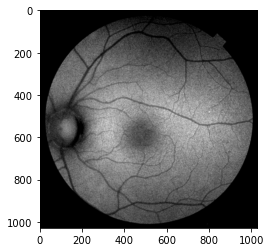

In [23]:
# predict for my data
new_path = './mydata/test/test_norma/norma.0.jpg'
image_result=Image.open(new_path)

img_width,img_height = 200, 200 # как при тренировке исходной модели

def data_resizing_process(dirs):
    datas = image.load_img(dirs, target_size = (img_width,img_height))
    res = image.img_to_array(datas)
    res = np.expand_dims(res, axis = 0)
    res /= 255
    return res

# img = image.load_img(new_path, target_size=(img_width,img_height,3))
# img = image.img_to_array(img)
# img = np.expand_dims(img, axis=0)
# img = img/255.

img = data_resizing_process(new_path)
result = new_model.predict(img)
print(np.argmax(result))

image_result=plt.imshow(image_result)
plt.title(Categories[np.argmax(result)])
plt.show()

In [25]:
new_model.save('my_model.h5')